Basic Sales Summary:
    product  total_qty  revenue
0    Apples         15     22.5
1   Bananas         20     16.0
2  Cherries          9     22.5


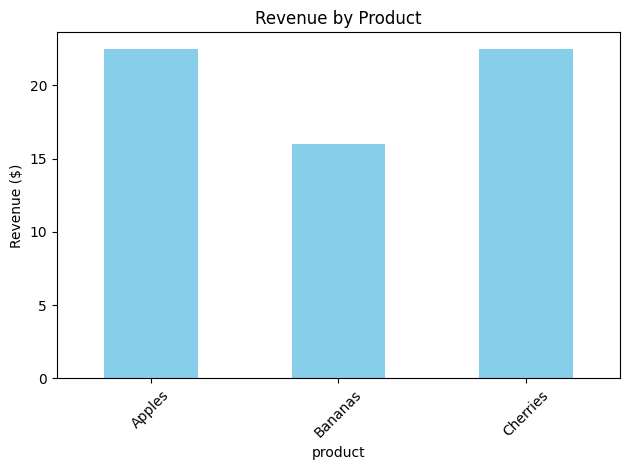

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. Create Database & Table
# =========================
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Clear any existing data for a clean run
cursor.execute("DELETE FROM sales")

# Insert sample rows
sample_data = [
    ("Apples", 10, 1.5),
    ("Apples", 5, 1.5),
    ("Bananas", 8, 0.8),
    ("Bananas", 12, 0.8),
    ("Cherries", 6, 2.5),
    ("Cherries", 3, 2.5)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()

# =========================
# 2. Query Sales Summary
# =========================
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

# =========================
# 3. Print Results
# =========================
print("Basic Sales Summary:")
print(df)

# =========================
# 4. Plot Bar Chart
# =========================
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.ylabel("Revenue ($)")
plt.title("Revenue by Product")
plt.xticks(rotation=45)
plt.tight_layout()

# Save chart as PNG
plt.savefig("sales_chart.png")
plt.show()


In [7]:
!python sales_summary.py


python3: can't open file '/content/sales_summary.py': [Errno 2] No such file or directory
